In [1]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *


plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


#### Experiment #1 : $\beta$ accross all layers (Top-10% filters)

In [2]:

mixed = []
sym  =  []   #beta < .25
anti =  []  #beta > .75

model = VGG16(weights=None,
                  include_top=False,
                  input_shape=(224, 224, 3))
conv_layers = []
for l in model.layers:
    if 'conv2d' in str(type(l)).lower():
        conv_layers.append(l)
        

l_num = 10
anti.append(0)
sym.append(0)
mixed.append(0)
count = 0
print(f" ============ LAYER {l_num} ==================")
top10F=topKfilters(model, l_num, k=100)
beta_f = []


filters = get_filter(model, l_num)


s, a = getSymAntiSymTF(filters)
a_energy = reduce_euclidean_norm(a, axis=[0,1])**2
s_energy = reduce_euclidean_norm(s, axis=[0,1])**2
total_energy  = reduce_euclidean_norm(filters, axis=[0,1])**2
beta = a_energy/total_energy


beta = tf.reshape(beta, -1)
count = beta.shape[-1]




anti[-1] = beta[beta > 0.75].shape[-1]
sym[-1] = beta[beta < 0.25].shape[-1]
mixed[-1] = count - (anti[-1] + sym[-1] )

anti[-1] = anti[-1]/count
sym[-1] = sym[-1]/count
mixed[-1] = mixed[-1]/count

print(anti, sym, mixed)
print(beta.shape[0])







 ============ LAYER 10 ==================
(512, 3, 3, 512) (512, 3, 3, 512) (512, 3, 3, 512)
[0.3897438049316406] [0.0343780517578125] [0.5758781433105469]
262144


In [3]:
(np.concatenate(([0], np.arange(2, len(conv_layers)+2, step=1))))

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

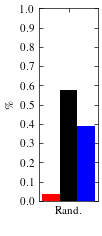

In [11]:

x = np.arange(1, 2, step=1)

width = 0.2
plt.rcParams['figure.figsize'] = (0.75, 2.5)

plt.bar(x-0.2, sym[0], width , color='r') 
plt.bar(x, mixed[0], width, color='k') 
plt.bar(x+0.2, anti[0], width, color='b') 

plt.xticks(x, ['Rand.']) 
plt.ylabel("\%") 

plt.xlabel("Rand.", color=(1,1,1,0)) 
x = x.tolist()

    

#plt.xticks(x)
plt.yticks(np.arange(0, 1.1, step=0.1))
#plt.title('R')

#ticks = plt.gca().get_xticklabels()
#ticks[0].set_rotation(-90)

plt.minorticks_off()
#plt.legend([r"$\beta\leq0.25$ (sym)",  r"$0.25<\beta<0.75$ (mix)", r"$\beta\geq0.75$ (anti)",], loc = 'upper right',  bbox_to_anchor=(.9,.95) )


plt.savefig('figures/Random_kernel_type.pdf', dpi=600)

plt.show() 

In [5]:
xlabel.get_size


NameError: name 'xlabel' is not defined